# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [2]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [3]:
new = pd.read_csv(r"C:\Users\Aditya\Desktop\IMARTICUS\Machine Learning\Linear Regression\Advertising.csv")
new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Data Type 

In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Univariate Analysis

In [5]:
# Let's look at some statistical information about our dataframe.
new.describe() 

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA
* Identify & Treatment of Outlier 

<Axes: >

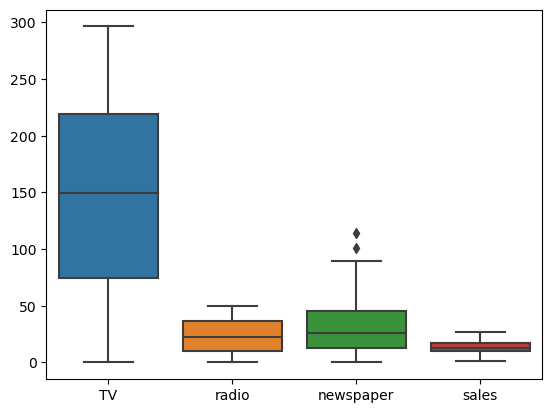

In [6]:
sns.boxplot(data=new)

### Treatment of Outlier -- Winsorizing Technique

In [7]:
q1 = new['newspaper'].quantile(0.25)
q3 = new['newspaper'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

93.625

In [8]:
new['newspaper'] = np.where(new['newspaper'] > upper_limit,upper_limit,new['newspaper']) # upper limit

<Axes: >

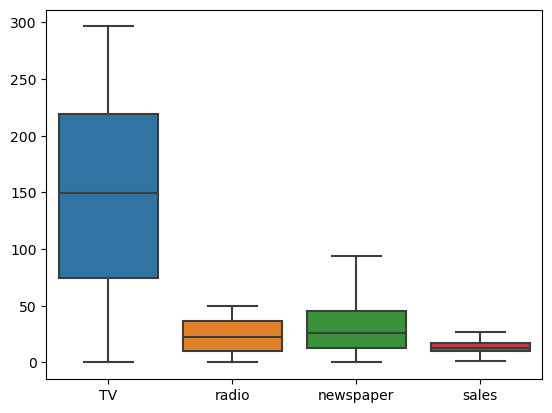

In [9]:
sns.boxplot(data=new)

### Missing Value

In [10]:
new.isna().sum()  # no missing data

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [11]:
new.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
# Putting feature variable to X
X = new.drop('sales', axis= 1)

# Putting response variable to y
y = new[['sales']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=120)

In [13]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,sales,TV,radio,newspaper
111,21.8,241.7,38.0,23.2
156,15.3,93.9,43.5,50.5
140,10.9,73.4,17.0,12.9
171,14.5,164.5,20.9,47.4
157,10.1,149.8,1.3,24.3


# Correlation Matrix

<Axes: xlabel='TV', ylabel='sales'>

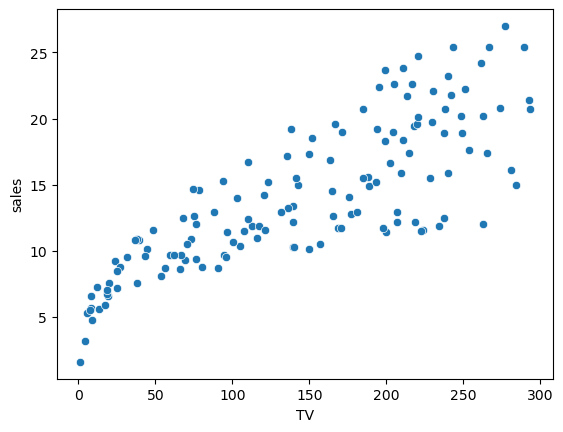

In [14]:
sns.scatterplot(x='TV', y='sales',data=df)

In [15]:
df.corr()

,sales,TV,radio,newspaper
sales,1.000000,0.813611,0.616691,0.220532
TV,0.813611,1.000000,0.147367,0.073830
radio,0.616691,0.147367,1.000000,0.300592
newspaper,0.220532,0.073830,0.300592,1.000000


<Axes: >

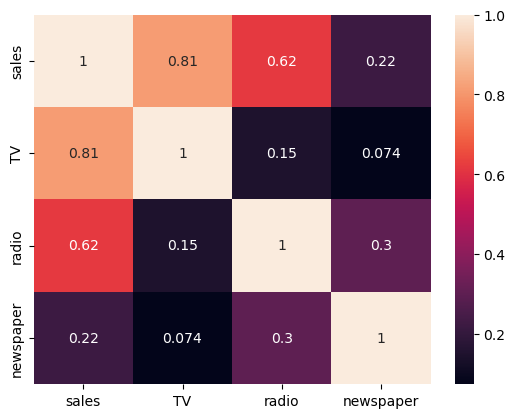

In [16]:
sns.heatmap(df.corr(),annot = True)

#### TV have 81%  strong positve correlation with Sales

* TV have high impact on Sales
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [17]:
X1=df.drop(['sales'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

TV           2.730779
radio        3.338435
newspaper    2.842430
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

# Model Building

# Method 2

In [18]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3 = lreg.fit(X_train,y_train)

In [19]:
np.round(Model3.intercept_,4)

array([2.7452])

In [20]:
np.round(Model3.coef_,4)

array([[0.0476, 0.1847, 0.0038]])

In [21]:
Model3.feature_names_in_

array(['TV', 'radio', 'newspaper'], dtype=object)

In [22]:
np.round(Model3.score(X_train,y_train),3)

0.914

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [23]:
df.head()

,sales,TV,radio,newspaper
111,21.8,241.7,38.0,23.2
156,15.3,93.9,43.5,50.5
140,10.9,73.4,17.0,12.9
171,14.5,164.5,20.9,47.4
157,10.1,149.8,1.3,24.3


In [24]:
# Y = intercet + b1 * Tv + b2 * radio + b3 * newspaper
Y = 2.7452 + 0.0476 * 241.7  + 0.1847 * 38 +0.0038 *23.2
Y

21.35688

In [25]:
df.head()

,sales,TV,radio,newspaper
111,21.8,241.7,38.0,23.2
156,15.3,93.9,43.5,50.5
140,10.9,73.4,17.0,12.9
171,14.5,164.5,20.9,47.4
157,10.1,149.8,1.3,24.3


In [26]:
df['Predicted']= np.round(Model3.predict(X_train),1)
df['Residual']= np.round(df.sales-df.Predicted,1)
df.head()

,sales,TV,radio,newspaper,Predicted,Residual
111,21.8,241.7,38.0,23.2,21.4,0.4
156,15.3,93.9,43.5,50.5,15.4,-0.1
140,10.9,73.4,17.0,12.9,9.4,1.5
171,14.5,164.5,20.9,47.4,14.6,-0.1
157,10.1,149.8,1.3,24.3,10.2,-0.1


# Linearity

<Axes: title={'center': 'sales vs TV'}, xlabel='TV', ylabel='sales'>

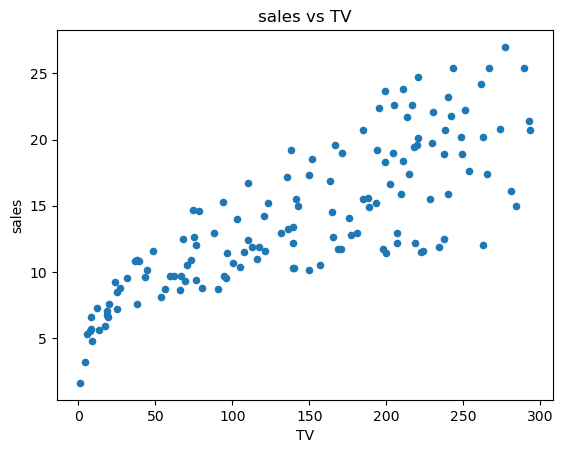

In [27]:
df.plot.scatter(x='TV', y='sales', title='sales vs TV')

# Homoscedasicity

<Axes: xlabel='Predicted', ylabel='Residual'>

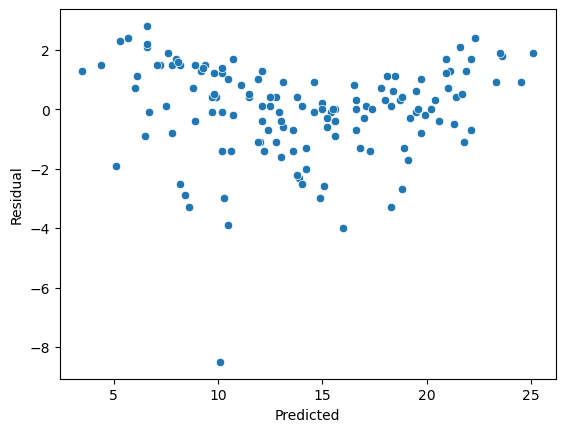

In [28]:
sns.scatterplot(x='Predicted', y='Residual',data=df)

# Normality

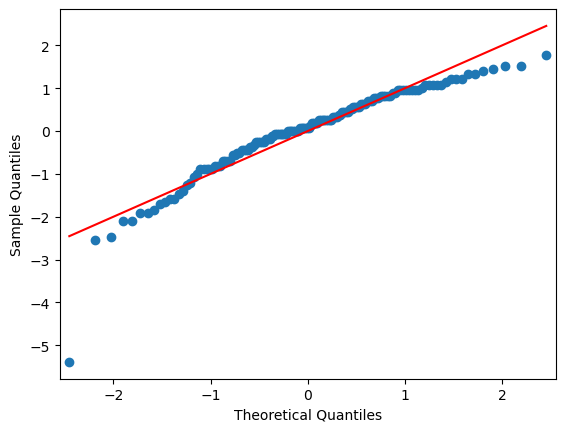

In [29]:
import statsmodels.api as sm
fig = sm.qqplot(df['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<Axes: ylabel='Frequency'>

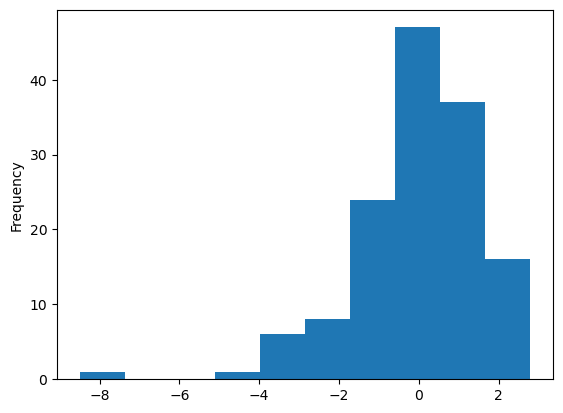

In [30]:
df['Residual'].plot.hist()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_1352\3858128530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Residual)


<Axes: xlabel='Residual', ylabel='Density'>

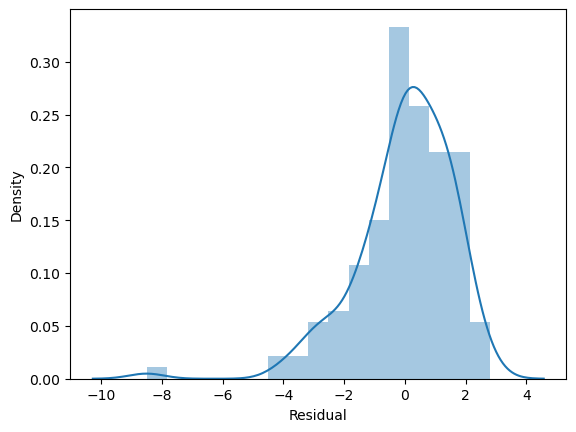

In [31]:
sns.distplot(df.Residual)

# Prediction on Test Data (unseen data)

In [32]:
df_test = pd.concat([X_test,y_test],axis=1)

df_test.head()

,TV,radio,newspaper,sales
87,110.7,40.6,63.2,16.0
118,125.7,36.9,79.2,15.9
80,76.4,26.7,22.3,11.8
198,283.6,42.0,66.2,25.5
62,239.3,15.5,27.3,15.7


In [33]:
df_test['Prediction']= np.round(Model3.predict(X_test),1) # predict = all row prediction ( Auto )
df_test.head()

,TV,radio,newspaper,sales,Prediction
87,110.7,40.6,63.2,16.0,15.8
118,125.7,36.9,79.2,15.9,15.8
80,76.4,26.7,22.3,11.8,11.4
198,283.6,42.0,66.2,25.5,24.3
62,239.3,15.5,27.3,15.7,17.1


# Train

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(df.sales, df.Predicted)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.91


# Test

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.sales, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Loss / Cost / Error Function - RMSE

In [36]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(df['sales'], df['Predicted'])
model_rmse = np.sqrt(model_mse)
print("Train RMSE : {:.3}".format(model_rmse))

Train RMSE : 1.58


In [37]:
model_mse = mean_squared_error(df_test['sales'], df_test['Prediction'])
model_rmse = np.sqrt(model_mse)
print("Test RMSE  : {:.3}".format(model_rmse))

Test RMSE  : 1.91


# Finished

# Prediction for Live Data  -- Population

In [38]:
d1 = {#'Customer':pd.Series(['Piyush','Yash','Suuny']),
      'TV'      :pd.Series([93.9,73.5,200]),
      'radio'   :pd.Series([43.5,18,35]),
      'newspaper':pd.Series([50.5,13,24]),
     }
live = pd.DataFrame(d1)
live

,TV,radio,newspaper
0,93.9,43.5,50.5
1,73.5,18.0,13.0
2,200.0,35.0,24.0


In [39]:
live['future Prediction']=np.round(Model3.predict(live),2)
live

,TV,radio,newspaper,future Prediction
0,93.9,43.5,50.5,15.44
1,73.5,18.0,13.0,9.62
2,200.0,35.0,24.0,18.82


# Finish